# 0. Importing the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import subprocess
from scipy.stats import randint
from matplotlib import pyplot as plt
from time import time
from operator import itemgetter
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import KFold

In [3]:
df = pd.read_csv('Speed Dating Data.csv', encoding="ISO-8859-1")

pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns",100)

df = df.iloc[:,:]

df.head(2)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,...,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,...,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,...,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [5]:
df.iloc[:,:69].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 69 columns):
iid         8378 non-null int64
id          8377 non-null float64
gender      8378 non-null int64
idg         8378 non-null int64
condtn      8378 non-null int64
wave        8378 non-null int64
round       8378 non-null int64
position    8378 non-null int64
positin1    6532 non-null float64
order       8378 non-null int64
partner     8378 non-null int64
pid         8368 non-null float64
match       8378 non-null int64
int_corr    8220 non-null float64
samerace    8378 non-null int64
age_o       8274 non-null float64
race_o      8305 non-null float64
pf_o_att    8289 non-null float64
pf_o_sin    8289 non-null float64
pf_o_int    8289 non-null float64
pf_o_fun    8280 non-null float64
pf_o_amb    8271 non-null float64
pf_o_sha    8249 non-null float64
dec_o       8378 non-null int64
attr_o      8166 non-null float64
sinc_o      8091 non-null float64
intel_o     8072 non-null float64

In [6]:
df.head(2)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,...,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,...,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,...,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## 1.0 Exploring the Data

### 1.1 Heatmap

<AxesSubplot:>

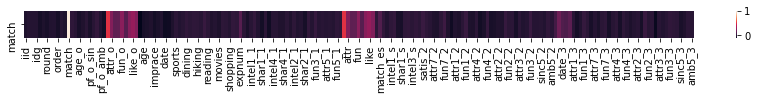

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,0.5))
sns.heatmap(df.corr().iloc[12:13,:])

### 1.2 Bar chart

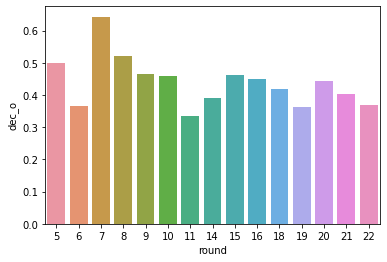

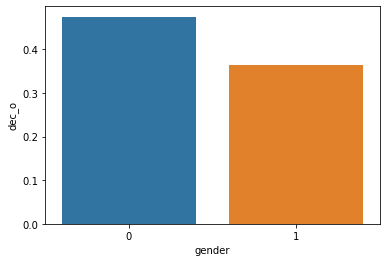

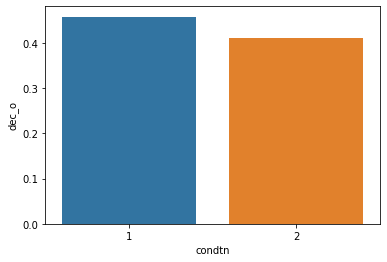

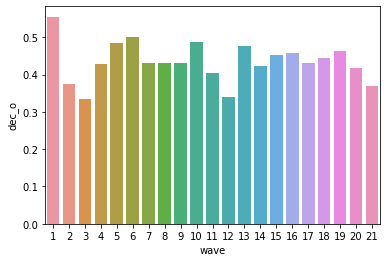

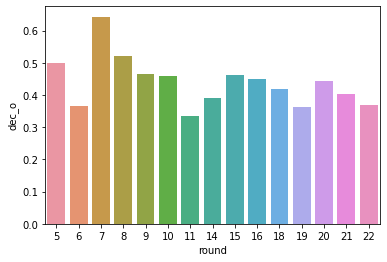

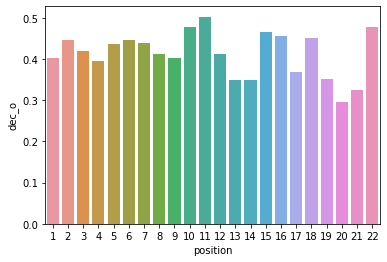

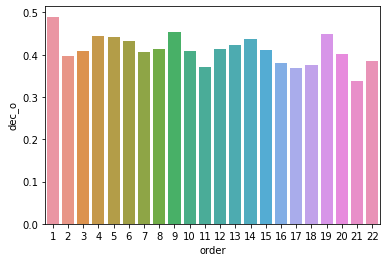

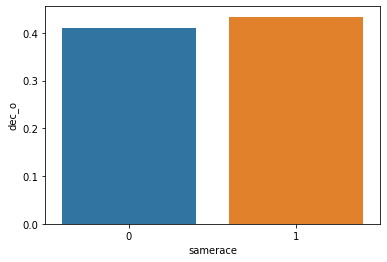

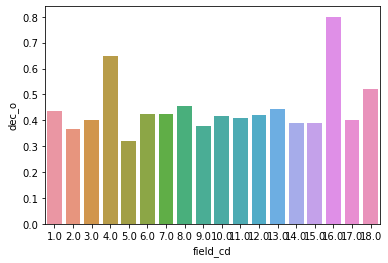

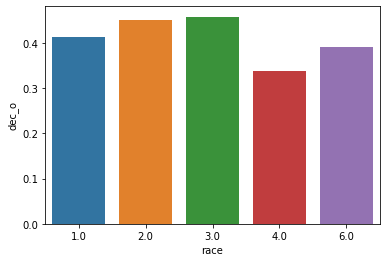

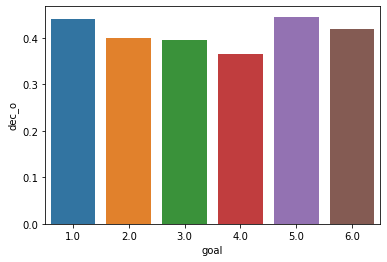

In [8]:
columns = ['round', 'gender', 'condtn', 'wave', 'round', 'position', 'order', 'samerace', 'field_cd', 'race', 'goal']
length =  len(columns)

for n in columns:
    df_ext = df[[n, 'dec_o']].groupby(by = n).mean().reset_index()
    plt.figure()
    sns.barplot(x= n, y='dec_o', data=df_ext)

### 1.3 Histogram 

In [9]:
# getting the income column
income_df = pd.read_csv('income.csv')
df = pd.merge(df, income_df, left_on= 'career', right_on = 'Profession')
df.drop('Profession', axis=1, inplace= True)

(array([30., 50., 80., 39., 53., 79., 43., 23., 29., 10.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

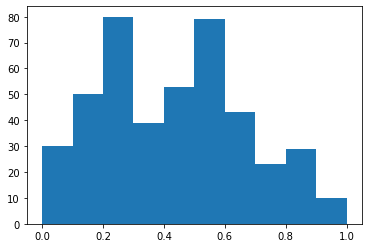

In [10]:
df_a = df.groupby(by = 'iid').mean()
plt.hist(df_a['dec_o'])

(array([184.,   0., 148.,   0.,  30.,   0.,  20.,   0.,  29.,  25.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

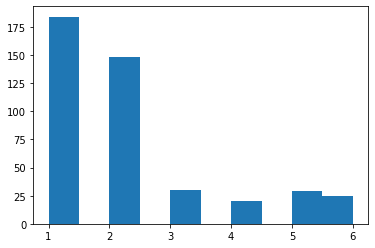

In [11]:
plt.hist(df_a['goal'])

## 1.4 Line Chart

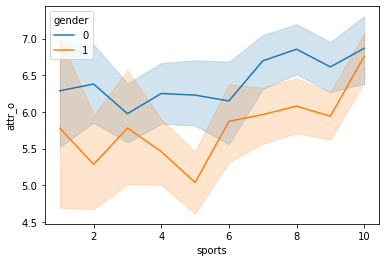

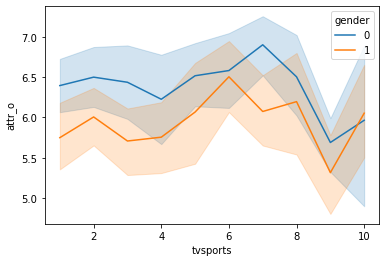

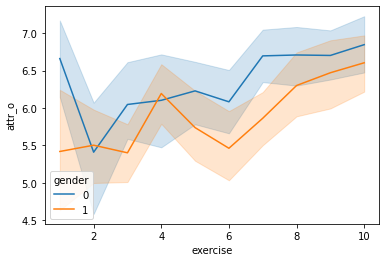

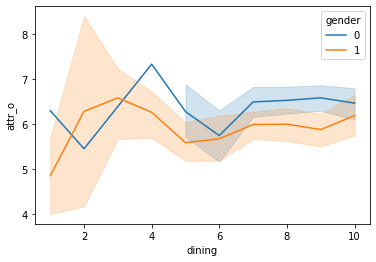

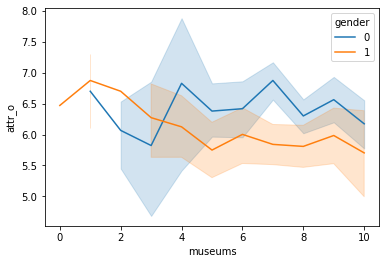

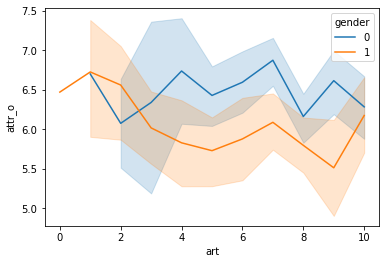

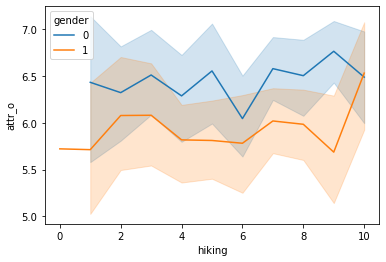

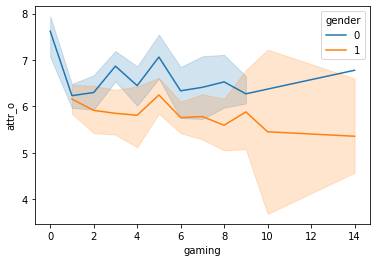

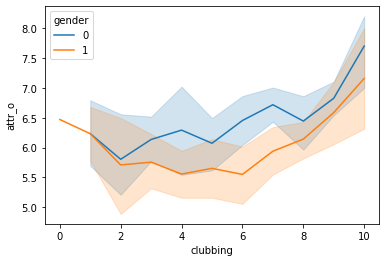

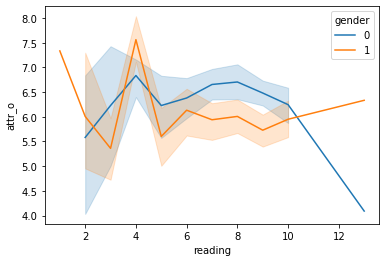

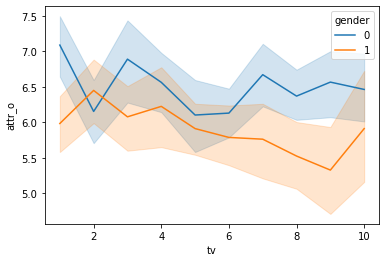

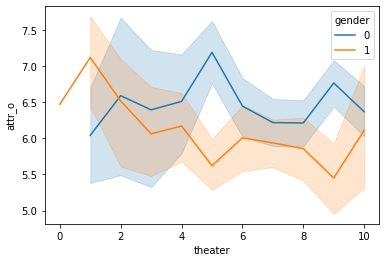

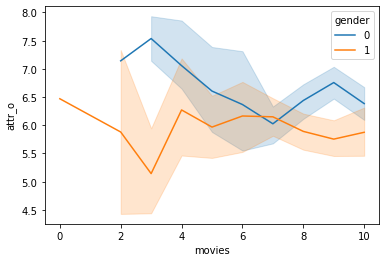

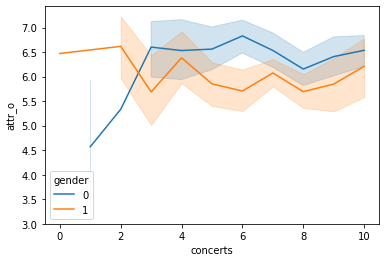

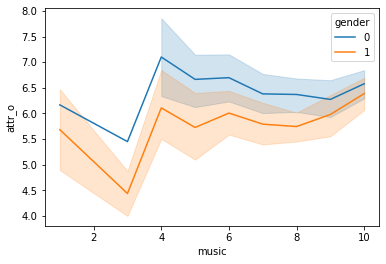

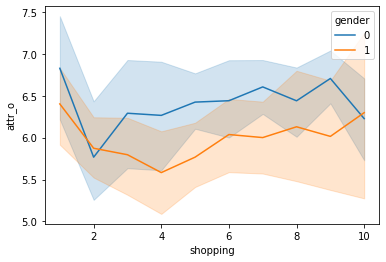

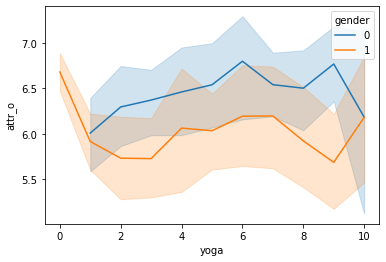

In [12]:
columns = ['sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
length =  len(columns)

for n in columns:
    df_ext = df[[n, 'attr_o', 'gender', 'iid']].groupby(by = [n, 'gender', 'iid']).mean().reset_index()
    plt.figure()
    sns.lineplot(x= n, y='attr_o', data=df_ext, hue='gender')
    plt.show()

# 2.0 Feature Engineering

In [13]:
columns = ['iid', 'gender', 'match', 'int_corr', 'samerace',
              'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
              'go_out', 'date', 'career', 'age', 'Income',
              'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
              'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 
              'music', 'shopping', 'yoga', 
              'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']

In [14]:
# to rescale the the values of date and go out
df_a['date'] = df_a['date'].map({7:1, 6:2, 5:3, 4:4, 3:5, 2:6, 7:1})
df_a['go_out'] = df_a['go_out'].map({7:1, 6:2, 5:3, 4:4, 3:5, 2:6, 7:1})

In [15]:
df_a = df[columns].dropna(axis=0).copy()
print(len(df_a))

5431


In [16]:
df_agg_a = df_a.groupby(by = 'iid').mean()

In [17]:
# separate Dataframe for Female (0) and for male (1)
female_filter = df_a.gender == 0
df_reg_f = df_a.loc[female_filter, :].copy()
male_filter = df_a.gender == 1
df_reg_m = df_a.loc[male_filter, :].copy()

# 3.0 Modeling

### 3.1 Logistic Regression

#### 3.1.a. Logistic Regresion for Female

In [18]:
# Importing relevant library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [19]:
# X and Y for Logistic Regression, Train and Test
X= df_reg_f[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']]
y= df_reg_f['dec_o']
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Fitting
logreg_f = LogisticRegression()
logreg_f.fit(X_train_f, y_train_f)

# Model Prediction
y_pred_train = logreg_f.predict(X_train_f)
y_pred_test = logreg_f.predict(X_test_f)
print("Train Prediction \t:", round(metrics.accuracy_score(y_train_f, y_pred_train)*100,3))
print("Test Prediction \t:", metrics.accuracy_score(y_test_f, y_pred_test)*100)
print("-"*50)

# features and coefficient
print('Features:')
print(pd.Series(logreg_f.coef_[0], index = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']))
print("-"*50)

#Storing the results
y_pred_prob = pd.DataFrame(logreg_f.predict_proba(X_test_f), columns = ['LR0', 'LR1'])
prob_female_df = pd.DataFrame(data = y_test_f.values, columns = ['F_Actual'] )
prob_female_df = pd.concat([prob_female_df, y_pred_prob['LR1']], axis=1)

print(prob_female_df.head(5))

Train Prediction 	: 76.552
Test Prediction 	: 72.34957020057307
--------------------------------------------------
Features:
attr_o     0.713034
sinc_o    -0.186351
intel_o   -0.102977
fun_o      0.325283
amb_o     -0.144496
shar_o     0.256157
dtype: float64
--------------------------------------------------
   F_Actual       LR1
0         1  0.699333
1         0  0.250359
2         1  0.443235
3         0  0.528620
4         0  0.800974


#### 3.1.b. Logistic Regresion for Male

In [20]:
# X and Y Logistic Regression 
X= df_reg_m[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']]
y= df_reg_m['dec_o']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Fitting
logreg_m = LogisticRegression()
logreg_m.fit(X_train_m, y_train_m)

# Model Prediction
y_pred_train = logreg_m.predict(X_train_m)
y_pred_test = logreg_m.predict(X_test_m)
print("Train Prediction \t: ", round(metrics.accuracy_score(y_train_m, y_pred_train)*100,3))
print("Test Prediction \t: ", round(metrics.accuracy_score(y_test_m, y_pred_test)*100,3))
print("-"*50)

# Features and Coefficient 
print('Features:')
print(pd.Series(logreg_m.coef_[0], index = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']))
print("-"*50)

#storing the results
y_pred_prob = pd.DataFrame(logreg_m.predict_proba(X_test_m), columns = ['LR0', 'LR1'])
prob_male_df = pd.DataFrame(data = y_test_m.values, columns = ['M_actual'])
prob_male_df = pd.concat([prob_male_df, y_pred_prob['LR1']], axis=1)

print(prob_male_df.head(5))

Train Prediction 	:  75.139
Test Prediction 	:  76.364
--------------------------------------------------
Features:
attr_o     0.391049
sinc_o    -0.073867
intel_o    0.149118
fun_o      0.293033
amb_o     -0.225662
shar_o     0.248157
dtype: float64
--------------------------------------------------
   M_actual       LR1
0         1  0.694768
1         1  0.712371
2         0  0.293182
3         1  0.006657
4         1  0.375105


## 3.2 Random Forest Regression

#### 3.2.a Random Forest Regression for Female

In [21]:
# Importing the Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn.model_selection import KFold

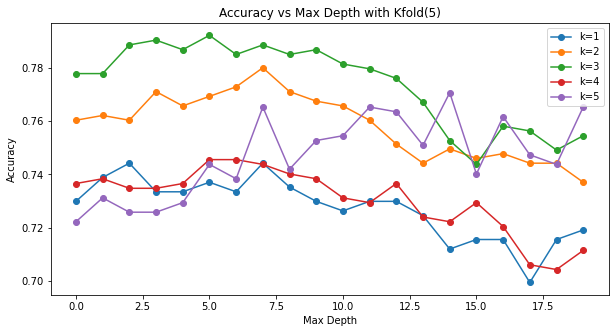

In [22]:
# Data X & Y
X= np.array(df_reg_f[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']])
y= np.array(df_reg_f['dec_o'])

# Kfold Validation
kf= KFold(n_splits = 5, shuffle = True, random_state=1334)
kf.get_n_splits(df_reg_f)

# Intialize accuracy df
acc_df=pd.DataFrame()

for n in np.arange(1,21):
    # Initialize accuracy array
    acc=[]

    for train_index, test_index in kf.split(df_reg_f):
        
        # X train and X test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Model initialization & fit
        model = RandomForestClassifier(max_depth=n)
        rf_f = model.fit(X_train, y_train)
        
        # Model Predition for train and test
        predict_train_rf = rf_f.predict(X_train)
        predict_test_rf = rf_f.predict(X_test)
        
        # Appending to the array
        acc.append(metrics.accuracy_score(y_test, predict_test_rf))
        
    # Appending to the df
    acc_df = pd.concat([acc_df, pd.Series(acc, name = n)], axis=1)

plt.figure(figsize = (10,5))
l = len(acc_df.loc[0])
plt.plot(range(l), acc_df.loc[0], marker ='.', markersize =12, label = 'k=1')
plt.plot(range(l), acc_df.loc[1], marker ='.', markersize =12, label = 'k=2')
plt.plot(range(l), acc_df.loc[2], marker ='.', markersize =12, label = 'k=3')
plt.plot(range(l), acc_df.loc[3], marker ='.', markersize =12, label = 'k=4')
plt.plot(range(l), acc_df.loc[4], marker ='.', markersize =12, label = 'k=5')
plt.title('Accuracy vs Max Depth with Kfold(5)')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

In [23]:
n_max= np.argmax(acc_df.mean())
print(n_max, acc_df.mean()[n_max]*100)

8 76.43282615525678


C:\Users\tommy\anaconda3\envs\python3.7\lib\site-packages\numpy\core\fromnumeric.py:58: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return bound(*args, **kwds)


Test Accuracy	: 73.496
--------------------------------------------------


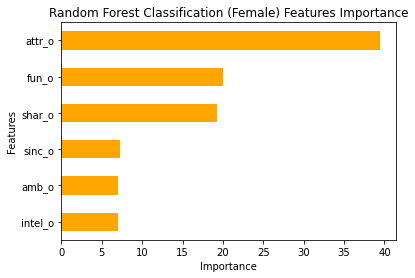

In [24]:
# Split Train and Test
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Fitting
model = RandomForestClassifier(max_depth = n_max)
rf_f = model.fit(X_train_f, y_train_f)

# Model prediction and accuracy
predict_test_rf = rf_f.predict(X_test_f)
print("Test Accuracy\t:", round(metrics.accuracy_score(y_test_f, predict_test_rf)*100,3))
print("-"*50)

# Importance of the coefficients
Importance = pd.DataFrame({'Importance':rf_f.feature_importances_*100}, index=['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o'])
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='orange', )
plt.title('Random Forest Classification (Female) Features Importance')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.gca().legend_ = None

In [25]:
#storing the results
y_pred_prob = pd.DataFrame(rf_f.predict_proba(X_test_f), columns=['RF_0', 'RF'])
prob_female_df = pd.concat([prob_female_df, y_pred_prob['RF']], axis=1)

prob_female_df.head(5)

,F_Actual,LR1,RF
0,1,0.699333,0.800175
1,0,0.250359,0.236976
2,1,0.443235,0.533625
3,0,0.528620,0.339128
4,0,0.800974,0.768109


#### 3.2.b Random Forest Regression for Male

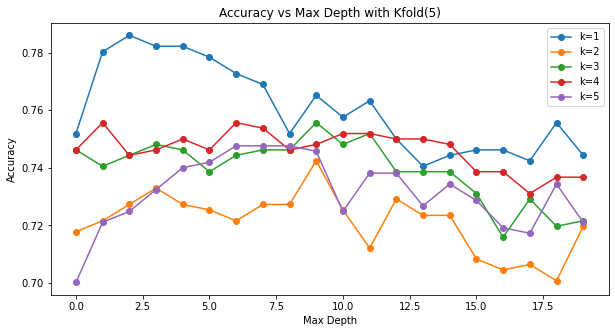

In [26]:
# Data
X= np.array(df_reg_m[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']])
y= np.array(df_reg_m['dec_o'])

# K-fold Validation
kf= KFold(n_splits = 5, shuffle = True, random_state=1334)
kf.get_n_splits(df_reg_m)

# DataFrame Initialization
acc_df=pd.DataFrame()

for n in np.arange(1,21):
    # Array Initialization
    acc=[]

    for train_index, test_index in kf.split(df_reg_m):

        # Split to train and Test with K-fold index
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Model and Fit
        model = RandomForestClassifier(max_depth=n, )
        rf_m = model.fit(X_train, y_train)

        # Prediction
        predict_train_rf = rf_m.predict(X_train)
        predict_test_rf = rf_m.predict(X_test)

        # Append result to the Array
        acc.append(metrics.accuracy_score(y_test, predict_test_rf))

    # Combine the result in DataFrame
    acc_df = pd.concat([acc_df, pd.Series(acc, name = n)], axis=1)

plt.figure(figsize = (10,5))
l = len(acc_df.loc[0])
plt.plot(range(l), acc_df.loc[0], marker ='.', markersize =12, label = 'k=1')
plt.plot(range(l), acc_df.loc[1], marker ='.', markersize =12, label = 'k=2')
plt.plot(range(l), acc_df.loc[2], marker ='.', markersize =12, label = 'k=3')
plt.plot(range(l), acc_df.loc[3], marker ='.', markersize =12, label = 'k=4')
plt.plot(range(l), acc_df.loc[4], marker ='.', markersize =12, label = 'k=5')
plt.title('Accuracy vs Max Depth with Kfold(5)')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

In [27]:
n_max= np.argmax(acc_df.mean())
print(n_max, acc_df.mean()[n_max]*100)

10 75.14188373296533


C:\Users\tommy\anaconda3\envs\python3.7\lib\site-packages\numpy\core\fromnumeric.py:58: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return bound(*args, **kwds)


Test Accuracy	: 77.273
--------------------------------------------------


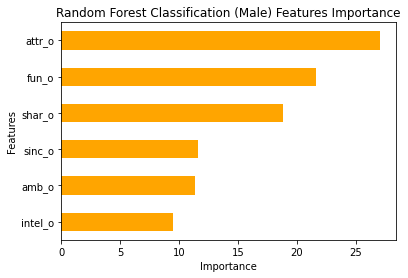

In [28]:
# Model Fitting
model = RandomForestClassifier(max_depth = n_max)
rf_m = model.fit(X_train_m, y_train_m)

# Model prediction and accuracy
predict_test_rf = rf_m.predict(X_test_m)
print("Test Accuracy\t:", round(metrics.accuracy_score(y_test_m, predict_test_rf)*100,3))
print('-'*50)

# Feature Importance
Importance = pd.DataFrame({'Importance':rf_m.feature_importances_*100}, index=['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o'])
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='orange', )
plt.title('Random Forest Classification (Male) Features Importance')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.gca().legend_ = None

In [29]:
#storing the results
y_pred_prob = pd.DataFrame(rf_m.predict_proba(X_test_m), columns=['RF_0', 'RF'])
prob_male_df = pd.concat([prob_male_df, y_pred_prob['RF']], axis=1)

prob_male_df.head(5)

,M_actual,LR1,RF
0,1,0.694768,0.689809
1,1,0.712371,0.536851
2,0,0.293182,0.306994
3,1,0.006657,0.302068
4,1,0.375105,0.606308


### 3.3 Decision Tree

#### 3.3.a Decision Tree Classifier for Female

In [30]:
# Data
columns = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']
x_female = df_reg_f[columns].copy()
y_female = df_reg_f['dec_o']

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x_female, y_female, test_size = 0.25, random_state=0)

# Initial Model
dtree = DecisionTreeClassifier(max_depth = 3, class_weight = 'balanced')
dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
tree_accuracy = round(accuracy_score(y_pred, y_test)*100, 3)
print('Decision Tree score \t:', tree_accuracy)

Decision Tree score 	: 76.361


#### Hyperparameter tuning with Grid Search CV

In [31]:
# dict of parameter list/distributions to sample
param_dist = {"criterion": ['gini', 'entropy'],
              "max_depth": range(1, 10),
              "min_samples_leaf": range(1, 10),
              "max_leaf_nodes": range(2, 10)}
cross_validation = KFold(5)

dt = DecisionTreeClassifier()
cv_dt = GridSearchCV(dt, param_dist, cv=cross_validation)
cv_dt.fit(x_train, y_train)

print("Best score:\n{:.3f}".format(cv_dt.best_score_*100))
print("Best Hyperparameters:\n{}".format(cv_dt.best_params_))

Best score:
75.070
Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 1}


In [32]:
# Model
dtree_f = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes= 8,  min_samples_leaf= 1)
dtree_f.fit(x_train, y_train)

# Fitting
y_pred = dtree_f.predict(x_test)
tree_accuracy = round(accuracy_score(y_test, y_pred)*100, 3)
cm = confusion_matrix(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),5)
print('Accuracy\t:',tree_accuracy)
print('ROC_AUC test\t:', auc)
print('Confusion Matrix:')
print(cm)

Accuracy	: 76.218
ROC_AUC test	: 0.75947
Confusion Matrix:
[[298  69]
 [ 97 234]]


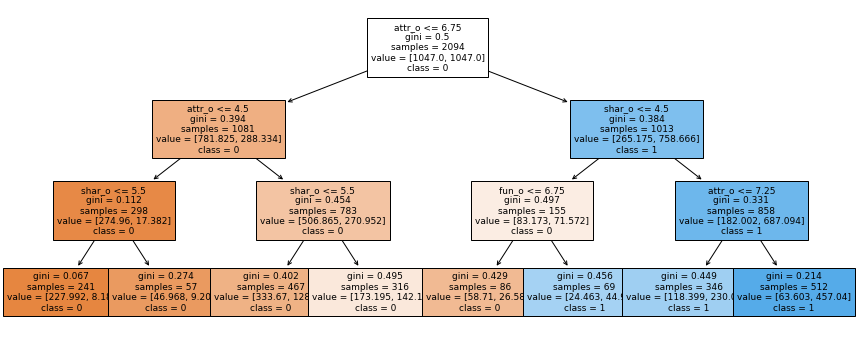

In [33]:
#Female
fig = plt.figure(figsize=(15,6))
fn=fn=['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']
cn=['0','1']
_ = tree.plot_tree(dtree.fit(x_train, y_train),feature_names=fn, class_names=cn, fontsize= 9, filled=True )

### 3.3.b Decision Tree Classifier for Male

In [34]:
# Data
columns = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']
x_male = df_reg_m[columns].copy()
y_male = df_reg_m['dec_o']

# Train Test Split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_male, y_male, test_size = 0.25, random_state=0)

# Initial Model
dtree = DecisionTreeClassifier(max_depth = 2, max_leaf_nodes= 7, min_samples_leaf= 8, min_samples_split= 7)
dtree.fit(x_train2, y_train2)

y_pred2 = dtree.predict(x_test2)
tree_accuracy = round(accuracy_score(y_pred2, y_test2)*100, 3)
print('Decision Tree score \t:', tree_accuracy)

Decision Tree score 	: 75.303


#### Hyperparameter tuning with Grid Search CV

In [35]:
# dict of parameter list/distributions to sample
param_dist = {"criterion": ['gini', 'entropy'],
              "max_depth": range(1, 10),
              "min_samples_leaf": range(1, 10),
              "max_leaf_nodes": range(2, 10)}
cross_validation = KFold(5)

dt = DecisionTreeClassifier()
cv_dt = GridSearchCV(dt, param_dist, cv=cross_validation)
cross_validation = KFold(5)

cv_dt.fit(x_train2, y_train2)

print("Best score:\n{:.3f}".format(cv_dt.best_score_*100))
print("Best Hyperparameters:\n{}".format(cv_dt.best_params_))

Best score:
74.886
Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 6, 'min_samples_leaf': 1}


In [36]:
from sklearn.metrics import roc_auc_score

dtree_m = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes= 7, min_samples_leaf= 1)
dtree_m.fit(x_train2, y_train2)

y_pred2 = dtree_m.predict(x_test2)
tree_accuracy = round(accuracy_score(y_test2, y_pred2)*100, 3)
cm = confusion_matrix(y_test2, y_pred2)
auc = round(roc_auc_score(y_test2, y_pred2),5)
print('Accuracy\t:',tree_accuracy)
print('ROC_AUC test\t:', auc)
print('Confusion Matrix:')
print(cm)

Accuracy	: 75.152
ROC_AUC test	: 0.69297
Confusion Matrix:
[[381  48]
 [116 115]]


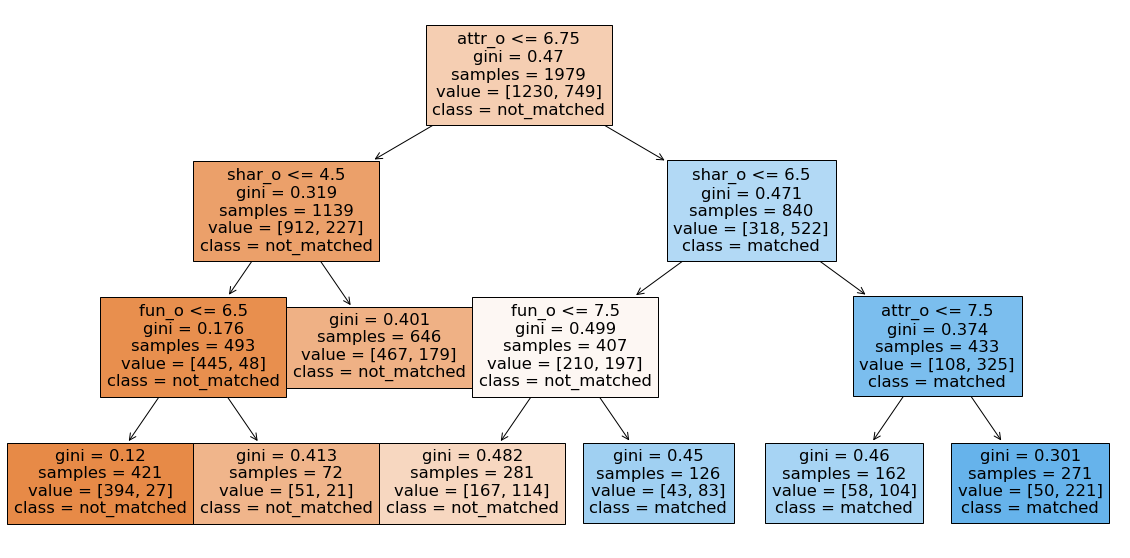

In [37]:
# male
fig = plt.figure(figsize=(20,10))
fn=fn=['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']
cn=['not_matched','matched']
_ = tree.plot_tree(dtree_m.fit(x_train2, y_train2),feature_names=fn, class_names=cn, filled=True)
plt.savefig('tree_male.png')

### 3.4 XGBOOST

In [38]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV  #Perforing grid search
import matplotlib.pylab as plt
from collections import Counter
%matplotlib inline
# plt.style.use('ggplot')

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn import svm
from sklearn.linear_model import BayesianRidge, LassoLars, ARDRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
import scipy.stats as st
import scipy as scipy
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error
%matplotlib inline
plt.style.use('ggplot')

#### 3.4.1 Female Model

In [40]:
d1 = pd.read_csv('decision_average.csv')
d1.head(5)

,iid,gender,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,age,dec_o
0,1,0,6.0,8.0,8.0,8.0,8.0,6.0,21.0,0
1,1,0,7.0,8.0,10.0,7.0,7.0,5.0,21.0,0
2,1,0,10.0,10.0,10.0,10.0,10.0,10.0,21.0,1
3,1,0,7.0,8.0,9.0,8.0,9.0,8.0,21.0,1
4,1,0,8.0,7.0,9.0,6.0,9.0,7.0,21.0,1


In [41]:
d1_woman=d1[d1['gender']==0]

X_ = d1_woman[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o']]
y_ = d1_woman['dec_o']

X_train_,X_test_,y_train_,y_test_=train_test_split(X_,y_,test_size=0.25,random_state=0)
print("Size of train dataset: {} rows".format(X_train_.shape[0])) 
print("Size of test dataset: {} rows".format(X_test_.shape[0]))

# check whether the data is unbalanced, it is a little unbalanced
from collections import Counter
print(Counter(y_test_))

#train a model with the default parameters.
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=42)

#print whether or not the last five men will be chosen based on our prediction
classifier.fit(X_train_, y_train_) 
predictions = classifier.predict(X_test_)

#use the score xgboost method to see how accurate our model is
print("Model Accuray: {:.2f}%".format(100*classifier.score(X_test_, y_test_)))

Size of train dataset: 3138 rows
Size of test dataset: 1046 rows
Counter({0: 546, 1: 500})
Model Accuray: 73.04%


Tuning max_depth and min_child_weight

In [42]:
# max_depth and min_child_weight hyperparameter tuning
print("Parameter optimization")
xgb_model = xgb.XGBClassifier()
clf = GridSearchCV(xgb_model,
                   {'max_depth':range(1,10), 'min_child_weight':range(1,10)},
                     scoring ='roc_auc',verbose=0, n_jobs=4,iid=True,cv = 5)
clf.fit(X_train_,y_train_)
print('-'*80)
print('Accuracy\t:', round(clf.best_score_*100,3))
print('Best Param\t:', clf.best_params_)
print('-'*80)

Parameter optimization
--------------------------------------------------------------------------------
Accuracy	: 84.484
Best Param	: {'max_depth': 2, 'min_child_weight': 4}
--------------------------------------------------------------------------------


C:\Users\tommy\anaconda3\envs\python3.7\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



Tuning Gamma

In [43]:
print("Parameter optimization")
xgb_model = xgb.XGBClassifier(max_depth=2, min_child_weight=4)
clf = GridSearchCV(xgb_model,
                   {'gamma':[i / 10.0 for i in range(0,5)]},
                     scoring ='roc_auc',verbose=1, n_jobs=4,iid=False,cv = 5)
clf.fit(X_train_, y_train_)
print('-'*80)
print('Accuracy\t:', round(clf.best_score_*100,3))
print('Best Param\t:', clf.best_params_)
print('-'*80)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Parameter optimization
Fitting 5 folds for each of 5 candidates, totalling 25 fits
--------------------------------------------------------------------------------
Accuracy	: 84.484
Best Param	: {'gamma': 0.0}
--------------------------------------------------------------------------------


[Parallel(n_jobs=4)]: Done  18 out of  25 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    0.3s finished
C:\Users\tommy\anaconda3\envs\python3.7\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



Tuning eta

In [44]:
print("Parameter optimization")

xgb_model = xgb.XGBClassifier(max_depth=2, min_child_weight=4,gamma=0.0)
clf = GridSearchCV(xgb_model,
                   {"eta" : [.3, .2, .1, .05, .01, .005]},
                     scoring ='roc_auc',verbose=1, n_jobs=4,iid=False,cv = 5)
clf.fit(X_train_, y_train_)
print('-'*80)
print('Accuracy\t:', round(clf.best_score_*100,3))
print('Best Param\t:', clf.best_params_)
print('-'*80)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Parameter optimization
Fitting 5 folds for each of 6 candidates, totalling 30 fits
--------------------------------------------------------------------------------
Accuracy	: 84.503
Best Param	: {'eta': 0.2}
--------------------------------------------------------------------------------


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.4s finished
C:\Users\tommy\anaconda3\envs\python3.7\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



Tuning n_estimators

In [45]:
print("Parameter optimization")
xgb_model = xgb.XGBClassifier(max_depth=2, min_child_weight=4,gamma=0.0,eta=0.2)
clf = GridSearchCV(xgb_model,
                   {'n_estimators': [100,200,500,1000,1500,2000]},
                     scoring ='roc_auc',verbose=1, n_jobs=4,iid=False,cv = 5)
clf.fit(X_train_, y_train_)
print('-'*80)
print('Accuracy\t:', round(clf.best_score_*100,3))
print('Best Param\t:', clf.best_params_)
print('-'*80)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Parameter optimization
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Done  23 out of  30 | elapsed:    2.0s remaining:    0.5s


--------------------------------------------------------------------------------
Accuracy	: 84.503
Best Param	: {'n_estimators': 100}
--------------------------------------------------------------------------------


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    3.3s finished
C:\Users\tommy\anaconda3\envs\python3.7\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



In [46]:
# Final Model
classifier_2 = xgb.sklearn.XGBClassifier(n_estimators=100, max_depth=2, min_child_weight=4,gamma=0.0,eta=0.2,nthread=-1, seed=42)
classifier_2.fit(X_train_, y_train_) 
predictions = classifier_2.predict(X_test_)
print("Model Accuray: {:.2f}%".format(100*classifier_2.score(X_test_, y_test_)))

Model Accuray: 74.86%


In [49]:
import shap

In [50]:
shap.initjs()
explainer = shap.TreeExplainer(classifier_2)

In [51]:
shap_values = explainer.shap_values(X_train_)

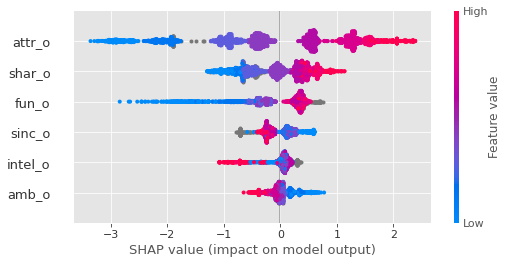

In [52]:
shap.summary_plot(shap_values, X_train_)

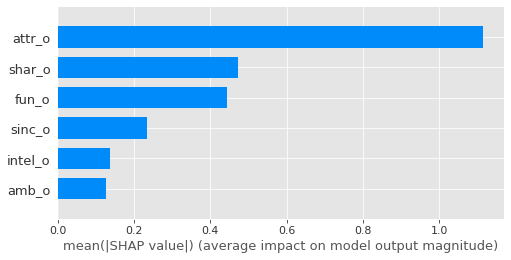

In [53]:
shap.summary_plot(shap_values, X_train_, plot_type="bar")

#### 3.4.2. Male Model

In [54]:
d1_man=d1[d1['gender']==1]
target = 'dec_o'

X = d1_man[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o']]
y = d1_man['dec_o']

#split the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# check whether the data is unbalanced, it is a little unbalanced
print(Counter(y_test))

#train a model with the default parameters.
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=42)
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)

#use the score xgboost method to see how accurate our model is
print("Model Accuray: {:.2f}%".format(100*classifier.score(X_test, y_test)))

Counter({0: 670, 1: 379})
Model Accuray: 72.55%


#### Hyperparameter Tuning 
max_depth and min_child_weight

In [55]:
# max_depth and min_child_weight hyperparameter tuning
xgb_model = xgb.XGBClassifier()
clf = GridSearchCV(xgb_model,
                   {'max_depth':range(1,10), 'min_child_weight':range(1,10)},
                     scoring ='roc_auc',verbose=0, n_jobs=4,iid=True,cv = 5)
clf.fit(X_train,y_train)
print('-'*80)
print('Accuracy\t:', round(clf.best_score_*100,3))
print('Best Parameters\t:', clf.best_params_)
print('-'*80)

--------------------------------------------------------------------------------
Accuracy	: 81.873
Best Parameters	: {'max_depth': 2, 'min_child_weight': 8}
--------------------------------------------------------------------------------


The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.


Tuning Gamma

In [56]:
print("Parameter optimization")
xgb_model = xgb.XGBClassifier(max_depth=2, min_child_weight=8)
clf = GridSearchCV(xgb_model,
                   {'gamma':[i / 10.0 for i in range(0,5)]},
                     scoring ='roc_auc',verbose=1, n_jobs=4,iid=False,cv = 5)
clf.fit(X_train, y_train)
print('-'*80)
print('Accuracy\t:', round(clf.best_score_*100,3))
print('Best Parameters\t:', clf.best_params_)
print('-'*80)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Parameter optimization
Fitting 5 folds for each of 5 candidates, totalling 25 fits
--------------------------------------------------------------------------------
Accuracy	: 81.947
Best Parameters	: {'gamma': 0.4}
--------------------------------------------------------------------------------


[Parallel(n_jobs=4)]: Done  18 out of  25 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    0.4s finished
The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.


Tuning eta

In [57]:
print("Parameter optimization")
xgb_model = xgb.XGBClassifier(max_depth=2, min_child_weight=8,gamma=0.4)
clf = GridSearchCV(xgb_model,
                   {"eta" : [.3, .2, .1, .05, .01, .005]},
                     scoring ='roc_auc',verbose=1, n_jobs=4,iid=False,cv = 5)
clf.fit(X_train, y_train)
print('-'*80)
print('Accuracy\t:', round(clf.best_score_*100,3))
print('Best Parameters\t:', clf.best_params_)
print('-'*80)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Parameter optimization
Fitting 5 folds for each of 6 candidates, totalling 30 fits
--------------------------------------------------------------------------------
Accuracy	: 82.154
Best Parameters	: {'eta': 0.1}
--------------------------------------------------------------------------------


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.4s finished
The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.


Tuning n_estimators

In [58]:
print("Parameter optimization")
xgb_model = xgb.XGBClassifier(max_depth=2, min_child_weight=4,gamma=0.0,eta=0.2)
clf = GridSearchCV(xgb_model,
                   {'n_estimators': [100,200,500,1000,1500,2000]},
                     scoring ='roc_auc',verbose=1, n_jobs=4,iid=False,cv = 5)

clf.fit(X_train, y_train)

print('-'*80)
print('Accuracy\t:', round(clf.best_score_*100,3))
print('Best Parameters\t:', clf.best_params_)
print('-'*80)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Parameter optimization
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Done  23 out of  30 | elapsed:    2.0s remaining:    0.5s


--------------------------------------------------------------------------------
Accuracy	: 82.094
Best Parameters	: {'n_estimators': 100}
--------------------------------------------------------------------------------


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    3.3s finished
The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.


In [59]:
# Final Model
classifier_1 = xgb.sklearn.XGBClassifier(n_estimators=100, max_depth=2, min_child_weight=8,gamma=0.4,eta=0.1,nthread=-1, seed=42)

classifier_1.fit(X_train, y_train) 
predictions = classifier_1.predict(X_test)

print("Model Accuray: {:.2f}%".format(100*classifier_1.score(X_test, y_test)))

Model Accuray: 76.17%


In [60]:
explainer = shap.TreeExplainer(classifier_1)
shap_values = explainer.shap_values(X_train)

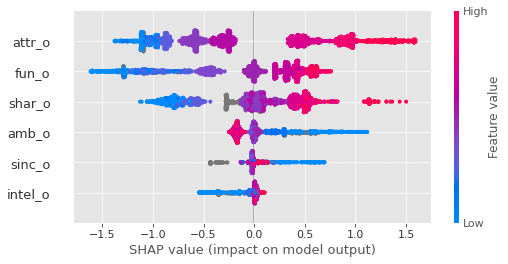

In [61]:
shap.summary_plot(shap_values, X_train)

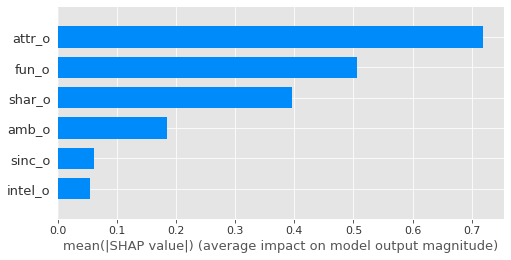

In [62]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

# 3.5 Model Choose for Stage 1 Classification Probability

A. Female

Text(0, 0.5, '% likeability')

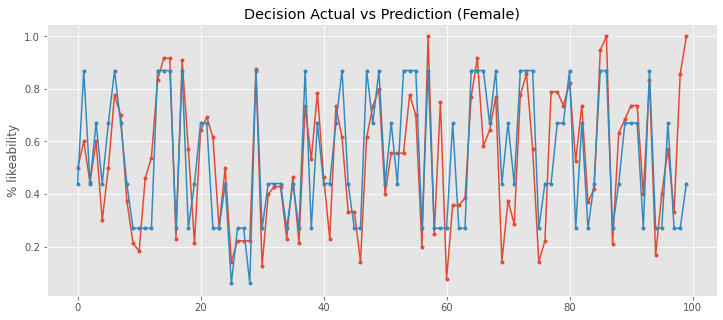

In [63]:
# filtering data set
f_filter = df_agg_a.gender ==0
df_agg_f = df_agg_a[f_filter].copy()
X_f = df_agg_f[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']].copy()

# predicting
df_agg_f['dec_pred'] = dtree_f.predict_proba(X_f)[:,-1:].round(2)

# plotting

plt.figure(figsize = (12,5))
plt.title('Decision Actual vs Prediction (Female)')
plt.plot(range(100), df_agg_f['dec_o'][:100], marker ='.')
plt.plot(range(100), df_agg_f['dec_pred'][:100], marker = '.')
plt.ylabel('% likeability')

In [64]:
# Data
columns = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']
x_female = df_reg_f[columns].copy()
y_female = df_reg_f['dec_o']

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x_female, y_female, test_size = 0.25, random_state=0)

# Fitting
y_pred = dtree_f.predict(x_test)
tree_accuracy = round(accuracy_score(y_test, y_pred)*100, 3)
cm = confusion_matrix(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred),5)
print('Accuracy\t:',tree_accuracy)
print('ROC_AUC test\t:', auc)
print('Confusion Matrix:')
print(cm)

Accuracy	: 76.218
ROC_AUC test	: 0.75947
Confusion Matrix:
[[298  69]
 [ 97 234]]


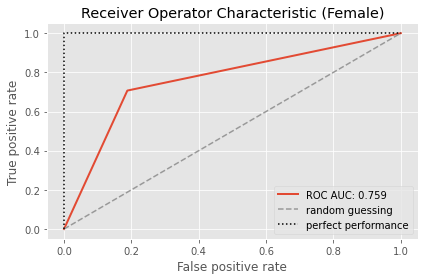

In [65]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

# AUC score that summarizes the ROC curve
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw = 2, label = 'ROC AUC: {:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1],
         linestyle = '--',
         color = (0.6, 0.6, 0.6),
         label = 'random guessing')
plt.plot([0, 0, 1], [0, 1, 1],
         linestyle = ':',
         color = 'black', 
         label = 'perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operator Characteristic (Female)')
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()

B. Male

Text(0, 0.5, '% likeability')

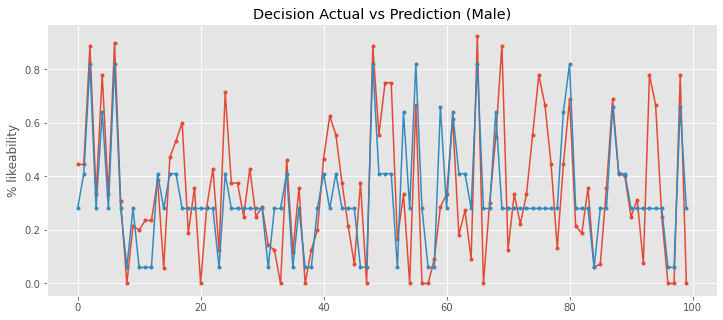

In [66]:
# filtering data set
m_filter = df_agg_a.gender ==1
df_agg_m = df_agg_a[m_filter].copy()
X_m = df_agg_m[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']].copy()

# predicting
df_agg_m['dec_pred'] = dtree_m.predict_proba(X_m)[:,-1:].round(2)

# plotting

plt.figure(figsize = (12,5))
plt.title('Decision Actual vs Prediction (Male)')
plt.plot(range(100), df_agg_m['dec_o'][:100], marker ='.')
plt.plot(range(100), df_agg_m['dec_pred'][:100], marker = '.')
plt.ylabel('% likeability')

In [67]:
# Data
columns = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']
x_male = df_reg_m[columns].copy()
y_male = df_reg_m['dec_o']

# Train Test Split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_male, y_male, test_size = 0.25, random_state=0)

from sklearn.metrics import roc_auc_score
y_pred2 = dtree_m.predict(x_test2)
tree_accuracy = round(accuracy_score(y_test2, y_pred2)*100, 3)
cm = confusion_matrix(y_test2, y_pred2)
auc = round(roc_auc_score(y_test2, y_pred2),5)
print('Accuracy\t:',tree_accuracy)
print('ROC_AUC test\t:', auc)
print('Confusion Matrix:')
print(cm)

Accuracy	: 75.152
ROC_AUC test	: 0.69297
Confusion Matrix:
[[381  48]
 [116 115]]


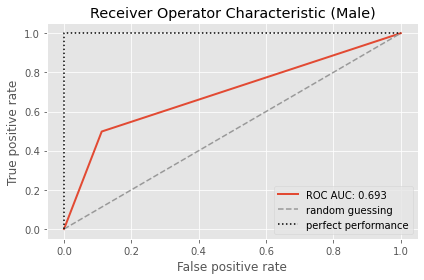

In [68]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test2, y_pred2, pos_label = 1)

# AUC score that summarizes the ROC curve
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw = 2, label = 'ROC AUC: {:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1],
         linestyle = '--',
         color = (0.6, 0.6, 0.6),
         label = 'random guessing')
plt.plot([0, 0, 1], [0, 1, 1],
         linestyle = ':',
         color = 'black', 
         label = 'perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operator Characteristic (Male)')
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()

# 4.0 Modelling interest to get the 6 Attributes

# 4.1 Fun_o

In [69]:
# Importing 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 

def Mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Data
columns=['sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 
       'fun3_1']
X = df_agg_a[columns].copy()
y = df_agg_a['fun_o']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Text(0.5, 1.0, 'Lasso coefficients as function of the regularization')

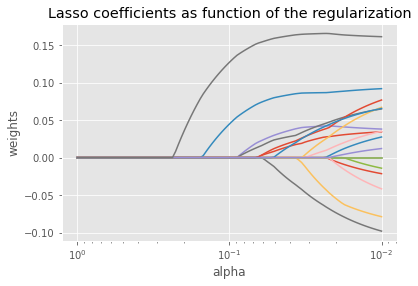

In [70]:
# Initialization
alphas = 10**np.linspace(0,-2,100)*0.5
lasso = Lasso(max_iter=10000)
coefs = []

# loop to decide alpha
for a in alphas*2:
    # model fitting 
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    
    # getting the coefficient
    coefs.append(lasso.coef_)

#plot
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as function of the regularization')

alpha		: 0.08803


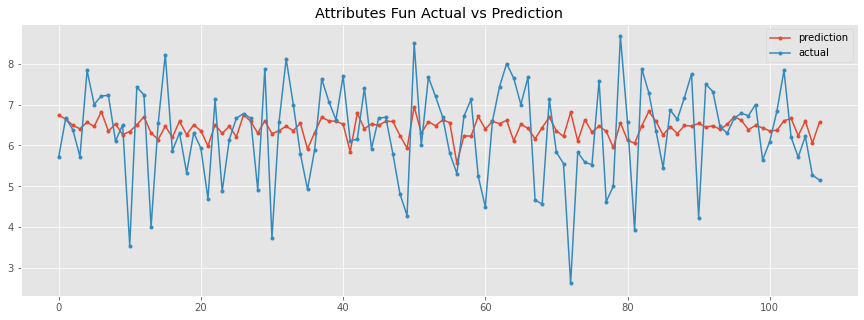

MSE		: 1.2
Mape Train	: 12.06
MAPE Test	: 13.27
--------------------------------------------------
Features Coefficient:
fun3_1      0.162666
clubbing    0.083962
exercise    0.036396
dining      0.028177
music       0.019838
shopping    0.015437
sports      0.015274
concerts   -0.000000
movies      0.000000
theater     0.000000
reading    -0.000000
yoga        0.000000
gaming     -0.000000
hiking      0.000000
art        -0.000000
museums    -0.000000
tvsports    0.000000
tv         -0.030565
dtype: float64


In [71]:
# models & fit 
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X_train), y_train.values.ravel())

print('alpha\t\t:', round(lassocv.alpha_,5))

# lasso model
lasso.set_params(alpha=0.04)
lasso.fit(scale(X_train), y_train)

# Mape
y_pred_test = lasso.predict(scale(X_test))
y_pred_train = lasso.predict(scale(X_train))

#plot
plt.figure(figsize=(15,5))
l=len(y_pred_test)
plt.plot(range(l), y_pred_test, marker='.', label = 'prediction')
plt.plot(range(l), y_test, marker='.', label = 'actual')
plt.title('Attributes Fun Actual vs Prediction')
plt.legend()
plt.show()


print('MSE\t\t:', round(mean_squared_error(y_test, lasso.predict(scale(X_test))),2))
print('Mape Train\t:', round(Mape(y_pred_train, y_train),2))
print('MAPE Test\t:', round(Mape(y_pred_test, y_test),2))
print('-'*50)

# Some of the coefficients are now reduced to exactly zero.
print('Features Coefficient:')
pd.set_option("display.max_rows", 20)
print(pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False))

#### Attr_O

In [72]:
# Importing 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 

def Mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Data
columns=['sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 
       'attr3_1']
X = df_agg_a[columns].copy()
y = df_agg_a['attr_o']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Text(0.5, 1.0, 'Lasso coefficients as function of the regularization')

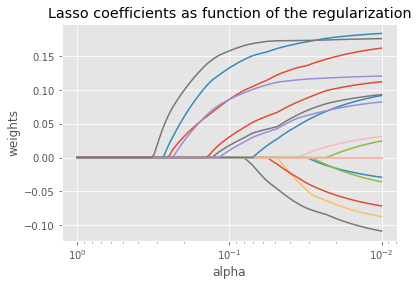

In [73]:
# Initialization
alphas = 10**np.linspace(0,-2,100)*0.5
lasso = Lasso(max_iter=10000)
coefs = []

# loop to decide alpha
for a in alphas*2:
    # model fitting 
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    
    # getting the coefficient
    coefs.append(lasso.coef_)

#plot
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as function of the regularization')

alpha		: 0.0257


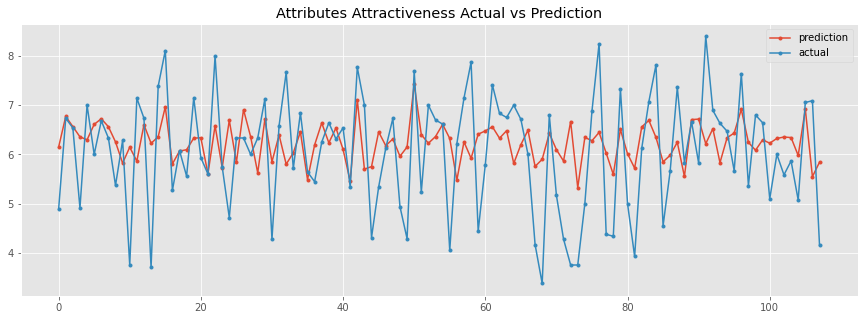

MSE		: 1.19
Mape Train	: 14.16
MAPE Test	: 14.15
--------------------------------------------------
Features Coefficient:
attr3_1     0.172848
clubbing    0.165991
sports      0.129264
exercise    0.113678
music       0.076812
dining      0.057087
yoga        0.052909
shopping    0.040252
concerts    0.000000
movies      0.000000
theater    -0.000000
reading    -0.000000
hiking      0.000000
art        -0.000000
tvsports   -0.000000
gaming     -0.022643
museums    -0.022691
tv         -0.060475
dtype: float64


In [74]:
# models & fit 
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X_train), y_train.values.ravel())

print('alpha\t\t:', round(lassocv.alpha_,5))

# lasso model
lasso.set_params(alpha=0.04)
lasso.fit(scale(X_train), y_train)

# Mape
y_pred_test = lasso.predict(scale(X_test))
y_pred_train = lasso.predict(scale(X_train))

#plot
plt.figure(figsize=(15,5))
l=len(y_pred_test)
plt.plot(range(l), y_pred_test, marker='.', label = 'prediction')
plt.plot(range(l), y_test, marker='.', label = 'actual')
plt.title('Attributes Attractiveness Actual vs Prediction')
plt.legend()
plt.show()

print('MSE\t\t:', round(mean_squared_error(y_test, lasso.predict(scale(X_test))),2))
print('Mape Train\t:', round(Mape(y_pred_train, y_train),2))
print('MAPE Test\t:', round(Mape(y_pred_test, y_test),2))
print('-'*50)

# Some of the coefficients are now reduced to exactly zero.
print('Features Coefficient:')
pd.set_option("display.max_rows", 20)
print(pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False))

# Shared Interest O

In [75]:
# Importing 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 

def Mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Data
columns=['sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
X = df_agg_a[columns].copy()
y = df_agg_a['shar_o']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Text(0.5, 1.0, 'Lasso coefficients as function of the regularization')

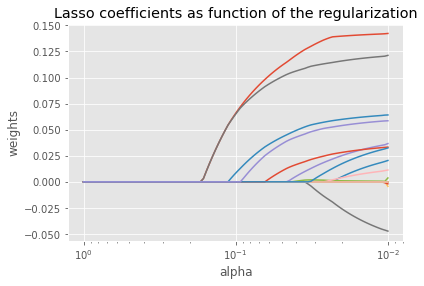

In [76]:
# Initialization
alphas = 10**np.linspace(0,-2,100)*0.5
lasso = Lasso(max_iter=10000)
coefs = []

# loop to decide alpha
for a in alphas*2:
    # model fitting 
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    
    # getting the coefficient
    coefs.append(lasso.coef_)

#plot
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as function of the regularization')

alpha		: 0.05832


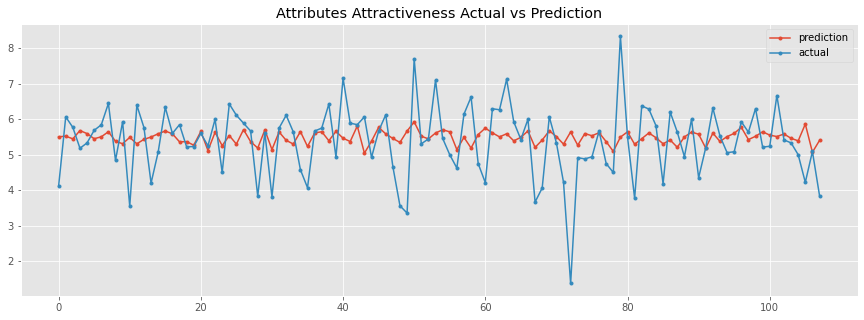

MSE		: 0.94
Mape Train	: 13.64
MAPE Test	: 13.1
--------------------------------------------------
Features Coefficient:
sports      0.121501
dining      0.106309
clubbing    0.049342
yoga        0.042941
music       0.016602
reading     0.005407
art         0.000661
concerts    0.000000
movies      0.000000
theater     0.000000
tv         -0.000000
shopping    0.000000
gaming     -0.000000
hiking      0.000000
museums     0.000000
exercise    0.000000
tvsports    0.000000
dtype: float64


In [77]:
# models & fit 
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X_train), y_train.values.ravel())

print('alpha\t\t:', round(lassocv.alpha_,5))

# lasso model
lasso.set_params(alpha=0.04)
lasso.fit(scale(X_train), y_train)

# Mape
y_pred_test = lasso.predict(scale(X_test))
y_pred_train = lasso.predict(scale(X_train))

#plot
plt.figure(figsize=(15,5))
l=len(y_pred_test)
plt.plot(range(l), y_pred_test, marker='.', label = 'prediction')
plt.plot(range(l), y_test, marker='.', label = 'actual')
plt.title('Attributes Attractiveness Actual vs Prediction')
plt.legend()
plt.show()

print('MSE\t\t:', round(mean_squared_error(y_test, lasso.predict(scale(X_test))),2))
print('Mape Train\t:', round(Mape(y_pred_train, y_train),2))
print('MAPE Test\t:', round(Mape(y_pred_test, y_test),2))
print('-'*50)

# Some of the coefficients are now reduced to exactly zero.
print('Features Coefficient:')
pd.set_option("display.max_rows", 20)
print(pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False))

# 5.0 Customer Classification

#### 5.0 k-clustering

#### 5.1.a. k-clustering for female

In [78]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale 

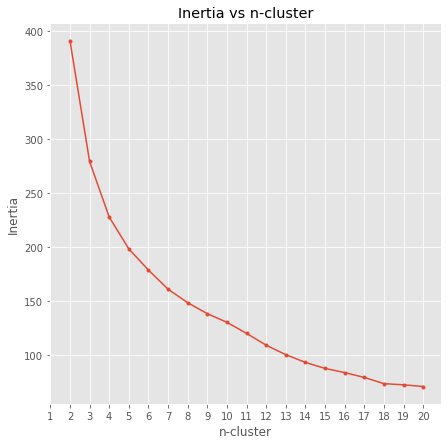

In [79]:
# data
df_clust_f = df_agg_f[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'Income', 'dec_pred']].copy()
X = scale(df_clust_f[['attr_o', 'fun_o', 'shar_o', 'dec_pred']])

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}
inertia = []


# looping with n_clusters = k
for k in range(2,21):
    km = KMeans(n_clusters = k, **kmeans_kwargs)
    km.fit(X)
    inertia.append(km.inertia_)

# Plotting the figure to select the k (elbow method)
plt.figure(figsize = (7,7))
plt.title('Inertia vs n-cluster')
plt.ylabel('Inertia')
plt.xlabel('n-cluster')
plt.plot(range(2, 21), inertia, marker = '.')
plt.xticks(range(1, 21))
plt.show()

           attr_o    sinc_o   intel_o     fun_o     amb_o    shar_o  \
cluster                                                               
0        4.712179  6.915085  6.884461  5.000572  5.830381  4.142797   
1        5.704127  7.152303  7.141726  6.075503  6.313481  4.986377   
2        7.299792  7.267292  7.152053  6.530742  6.624133  5.526443   
3        7.537663  7.450083  7.582345  7.366212  7.120001  6.407677   
4        6.239354  7.432642  7.433912  6.774956  6.747421  5.913775   

              Income  dec_pred  
cluster                         
0         915.377636  0.193636  
1        1005.853126  0.282373  
2        1116.982051  0.755714  
3        1184.117753  0.797586  
4        1002.027556  0.425217  
--------------------------------------------------------------------------------


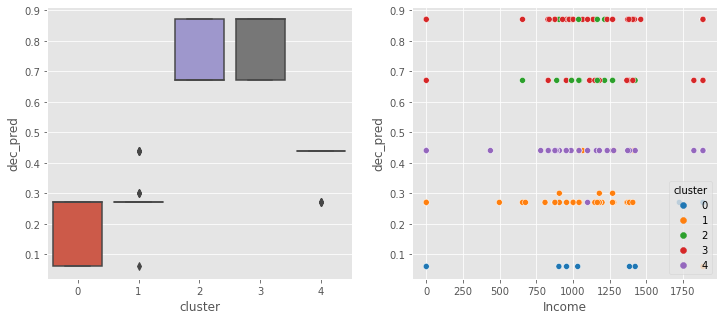

In [80]:
# model
km = KMeans(n_clusters = 5, **kmeans_kwargs)
km.fit(X)
df_clust_f['cluster'] = km.labels_

# Printing the average of all the groups
print(df_clust_f.groupby(by= 'cluster').mean())
print('-'*80)

# Plotting
plt.figure(figsize = (12,5))
# ---plot1---
plt.subplot(1,2,1)
sns.boxplot(y = 'dec_pred', x = 'cluster', data = df_clust_f)
# ---plot2---
plt.subplot(1,2,2)
sns.scatterplot(x= 'Income', y='dec_pred', data = df_clust_f, hue = 'cluster', palette = 'tab10')
plt.show()

#### 5.1.b k-means clustering for male

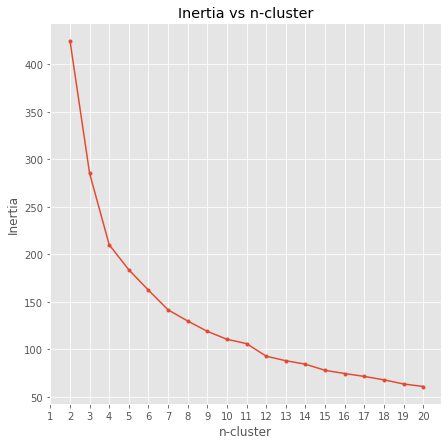

In [81]:
# data
df_clust_m = df_agg_m[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'Income', 'dec_pred']].copy()
X = scale(df_clust_m[['attr_o', 'fun_o', 'shar_o', 'dec_pred']])

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}
inertia = []


# looping with n_clusters = k
for k in range(2,21):
    km = KMeans(n_clusters = k, **kmeans_kwargs)
    km.fit(X)
    inertia.append(km.inertia_)

# Plotting the figure to select the k (elbow method)
plt.figure(figsize = (7,7))
plt.title('Inertia vs n-cluster')
plt.ylabel('Inertia')
plt.xlabel('n-cluster')
plt.plot(range(2, 21), inertia, marker = '.')
plt.xticks(range(1, 21))
plt.show()

           attr_o    sinc_o   intel_o     fun_o     amb_o    shar_o  \
cluster                                                               
0        6.037907  7.059522  7.369824  6.054316  6.789393  5.159404   
1        4.787067  7.108652  7.408454  5.643061  6.782426  5.082288   
2        6.214273  7.457669  7.701112  7.293217  7.551894  6.205165   
3        7.386167  7.363647  7.535364  6.941031  7.116270  5.679538   
4        4.527375  6.605456  6.999394  4.723362  6.460046  3.861646   
5        7.458639  7.701653  8.002015  7.697640  7.676059  6.791069   

              Income  dec_pred  
cluster                         
0        1156.517320  0.272941  
1        1126.794031  0.280294  
2        1169.698452  0.280000  
3        1192.023765  0.410000  
4        1181.032386  0.060000  
5        1172.591150  0.697419  
--------------------------------------------------------------------------------


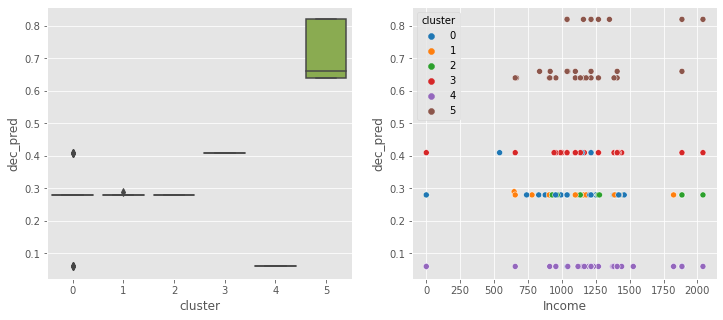

In [82]:
# model
km = KMeans(n_clusters = 6, **kmeans_kwargs)
km.fit(X)
df_clust_m['cluster'] = km.labels_

# Printing the average of all the groups
print(df_clust_m.groupby(by= 'cluster').mean())
print('-'*80)

# Plotting
plt.figure(figsize = (12,5))
# ---plot1---
plt.subplot(1,2,1)
sns.boxplot(y = 'dec_pred', x = 'cluster', data = df_clust_m)
# ---plot2---
plt.subplot(1,2,2)
sns.scatterplot(x= 'Income', y='dec_pred', data = df_clust_m, hue = 'cluster', palette = 'tab10')
plt.show()

# 5.2 Product 3 (Clustering) 

In [83]:
df_agg_a.columns

Index(['gender', 'match', 'int_corr', 'samerace', 'dec_o', 'attr_o', 'sinc_o',
       'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'go_out', 'date',
       'age', 'Income', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr3_1', 'sinc3_1',
       'intel3_1', 'fun3_1', 'amb3_1'],
      dtype='object')

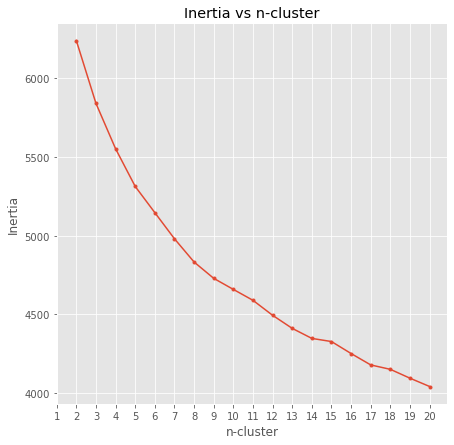

In [84]:
# data
df_clust_a = df_agg_a[['gender', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']].copy()
X = scale(df_clust_a[['sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']])

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}
inertia = []


# looping with n_clusters = k
for k in range(2,21):
    km = KMeans(n_clusters = k, **kmeans_kwargs)
    km.fit(X)
    inertia.append(km.inertia_)

# Plotting the figure to select the k (elbow method)
plt.figure(figsize = (7,7))
plt.title('Inertia vs n-cluster')
plt.ylabel('Inertia')
plt.xlabel('n-cluster')
plt.plot(range(2, 21), inertia, marker = '.')
plt.xticks(range(1, 21))
plt.show()

<AxesSubplot:ylabel='cluster'>

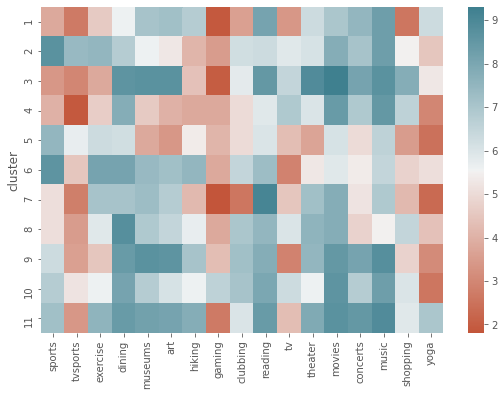

In [85]:
# model
km = KMeans(n_clusters = 12, **kmeans_kwargs)
km.fit(X)
df_clust_a['cluster'] = km.labels_

# Printing the average of all the groups
plt.figure(figsize = (9,6))
cmap = sns.diverging_palette(20, 215, as_cmap=True)
sns.heatmap(df_clust_a.groupby(by= ['cluster']).mean().round(1).iloc[1:,1:], cmap=cmap)

In [86]:
df_clust_a.groupby(by= ['cluster']).mean().round(1)

,gender,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
cluster,,,,,,,,,,,,,,,,,,
0,0.3,7.4,6.8,8.0,9.1,8.6,8.4,7.2,6.8,6.2,8.4,7.8,8.5,9.0,8.7,9.0,7.9,6.4
1,0.5,3.8,2.7,4.6,5.6,7.1,7.2,6.8,1.9,3.6,8.1,3.4,6.3,7.0,7.5,8.3,2.6,6.3
2,0.6,8.7,7.4,7.5,6.8,5.6,5.3,4.1,3.5,6.2,6.3,5.9,6.1,7.8,7.1,8.3,5.5,4.5
3,0.2,3.4,3.0,3.8,8.6,8.7,8.7,4.4,2.0,5.8,8.5,6.5,8.9,9.3,8.1,8.7,7.8,5.3
4,0.4,4.0,1.9,4.7,7.8,4.6,4.0,3.8,3.8,5.0,5.9,6.9,6.0,8.4,6.9,8.5,6.6,3.0
5,0.8,7.5,5.7,6.3,6.2,3.8,3.4,5.4,4.1,5.0,6.0,4.3,3.7,6.1,5.0,6.6,3.5,2.5
6,0.6,8.6,4.5,8.1,8.1,7.4,7.2,7.5,3.8,6.5,7.3,2.9,5.3,5.9,5.4,6.5,4.8,5.1
7,0.5,5.1,2.8,7.1,7.1,7.3,6.8,4.2,1.8,2.6,9.1,4.5,7.2,7.8,5.2,6.9,4.2,2.3
8,0.3,5.1,3.5,5.9,8.8,6.9,6.5,5.7,3.8,7.0,7.5,6.0,7.6,7.8,4.8,5.5,6.5,4.4


# 6.0 Example for Case Study

#### 6.1 Case Study Female

In [87]:
df_clust_f[df_clust_f.cluster == 1]

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,Income,dec_pred,cluster
iid,,,,,,,,,
21,5.071429,7.428571,7.928571,5.714286,6.785714,5.000000,0.000000,0.27,1
23,5.846154,7.000000,6.692308,6.000000,6.076923,4.923077,1367.000000,0.27,1
29,5.769231,7.076923,6.384615,6.076923,6.307692,4.692308,1185.148148,0.27,1
36,6.461538,7.153846,7.307692,6.230769,7.384615,5.230769,1041.000000,0.27,1
37,4.909091,7.090909,7.272727,5.727273,6.727273,5.181818,1198.121111,0.27,1
39,4.285714,7.500000,7.000000,7.071429,6.285714,5.357143,1886.000000,0.06,1
57,5.444444,7.777778,6.888889,6.000000,5.777778,4.666667,877.000000,0.27,1
60,4.888889,7.000000,6.333333,6.777778,6.222222,4.666667,954.000000,0.27,1
63,4.625000,6.875000,7.000000,6.000000,5.500000,4.625000,0.000000,0.27,1


In [88]:
f1_x = df_clust_f.loc[[37,39,57], ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']]
f1_y = df_clust_f.loc[[37,39,57], ['dec_pred']]

print('Before Workshop')
print('-'*80)
print(f1_x)
print(f1_y)

Before Workshop
--------------------------------------------------------------------------------
       attr_o    sinc_o   intel_o     fun_o     amb_o    shar_o
iid                                                            
37   4.909091  7.090909  7.272727  5.727273  6.727273  5.181818
39   4.285714  7.500000  7.000000  7.071429  6.285714  5.357143
57   5.444444  7.777778  6.888889  6.000000  5.777778  4.666667
     dec_pred
iid          
37       0.27
39       0.06
57       0.27


In [89]:
f1_x['attr_o'] = f1_x['attr_o'] + 2
# m1_x['fun_o'] = m1_x['fun_o'] + 2

print('After Workshop')
print('-'*80)
print(f1_x)

f1_y_pred = dtree_f.predict_proba(np.array(f1_x))
print(f1_y_pred[:,-1:])

After Workshop
--------------------------------------------------------------------------------
       attr_o    sinc_o   intel_o     fun_o     amb_o    shar_o
iid                                                            
37   6.909091  7.090909  7.272727  5.727273  6.727273  5.181818
39   6.285714  7.500000  7.000000  7.071429  6.285714  5.357143
57   7.444444  7.777778  6.888889  6.000000  5.777778  4.666667
[[0.6746988 ]
 [0.26980728]
 [0.87304688]]


#### 6.2 Case Study Male

In [90]:
df_clust_m[df_clust_m.cluster == 2]

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,Income,dec_pred,cluster
iid,,,,,,,,,
50,6.466667,6.400000,7.266667,7.666667,7.666667,5.866667,1886.000000,0.28,2
70,6.125000,7.250000,8.500000,7.875000,8.375000,6.375000,1038.400000,0.28,2
73,6.285714,7.285714,7.571429,7.428571,8.285714,5.857143,1044.300000,0.28,2
74,5.875000,8.250000,8.000000,7.000000,7.375000,5.500000,1441.375000,0.28,2
107,6.750000,8.250000,8.062500,8.000000,7.437500,7.125000,1270.000000,0.28,2
109,5.875000,7.750000,8.062500,7.000000,7.250000,6.437500,954.000000,0.28,2
110,5.714286,6.785714,7.142857,7.000000,7.214286,5.642857,1149.000000,0.28,2
184,6.333333,7.555556,7.333333,6.666667,7.111111,6.666667,1113.500000,0.28,2
190,6.666667,6.666667,6.888889,8.000000,6.888889,5.777778,1423.500000,0.28,2


In [92]:
m1_x = df_clust_m.loc[[41,43,44], ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']]
m1_y = df_clust_m.loc[[41,43,44], ['dec_pred']]

print('Before Workshop')
print('-'*80)
print(m1_x)
print(m1_y)

Before Workshop
--------------------------------------------------------------------------------
       attr_o    sinc_o   intel_o     fun_o     amb_o    shar_o
iid                                                            
41   3.636364  6.090909  6.727273  4.181818  7.181818  3.636364
43   4.066667  6.400000  7.200000  4.600000  6.600000  4.000000
44   4.941176  6.588235  6.705882  4.647059  5.823529  4.176471
     dec_pred
iid          
41       0.06
43       0.06
44       0.06


In [93]:
m1_x['attr_o'] = m1_x['attr_o'] + 2

print('After Workshop1')
print('-'*80)
print(m1_x)

m1_y_pred = dtree_m.predict_proba(np.array(m1_x))
print(m1_y_pred[:,-1:])

After Workshop1
--------------------------------------------------------------------------------
       attr_o    sinc_o   intel_o     fun_o     amb_o    shar_o
iid                                                            
41   5.636364  6.090909  6.727273  4.181818  7.181818  3.636364
43   6.066667  6.400000  7.200000  4.600000  6.600000  4.000000
44   6.941176  6.588235  6.705882  4.647059  5.823529  4.176471
[[0.06413302]
 [0.06413302]
 [0.40569395]]


In [94]:
m1_x['fun_o'] = m1_x['fun_o'] + 2

print('After Workshop2')
print('-'*80)
print(m1_x)

m1_y_pred = dtree_m.predict_proba(np.array(m1_x))
print(m1_y_pred[:,-1:])

After Workshop2
--------------------------------------------------------------------------------
       attr_o    sinc_o   intel_o     fun_o     amb_o    shar_o
iid                                                            
41   5.636364  6.090909  6.727273  6.181818  7.181818  3.636364
43   6.066667  6.400000  7.200000  6.600000  6.600000  4.000000
44   6.941176  6.588235  6.705882  6.647059  5.823529  4.176471
[[0.06413302]
 [0.29166667]
 [0.40569395]]
